In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall

In [8]:
import os
import yaml
import matplotlib.pyplot as plt
import cv2
import random
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!python Dataset_Creator.py 20000 0.75 0.15 0.10

Dataset will be split: Train=15000, Valid=3000, Test=2000
Loading existing label stats...
Class 2: count=994, w_mean=0.084381, w_std=0.012643, h_mean=0.310949, h_std=0.059023
  x_mean=0.042493, x_std=0.006163
Class 0: count=1046, w_mean=0.035695, w_std=0.008787, h_mean=0.290306, h_std=0.050967
Class 1: count=441, w_mean=0.080903, w_std=0.011799, h_mean=0.237129, h_std=0.023296
Generating 20000 synthetic images and assigning to splits...
[50/20000] saved: final_dataset/valid/images/synthetic_000049.jpg
[100/20000] saved: final_dataset/train/images/synthetic_000099.jpg
[150/20000] saved: final_dataset/test/images/synthetic_000149.jpg
[200/20000] saved: final_dataset/train/images/synthetic_000199.jpg
[250/20000] saved: final_dataset/valid/images/synthetic_000249.jpg
[300/20000] saved: final_dataset/train/images/synthetic_000299.jpg
[350/20000] saved: final_dataset/train/images/synthetic_000349.jpg
[400/20000] saved: final_dataset/train/images/synthetic_000399.jpg
[450/20000] saved: final_

Config file: {'train': 'train/images', 'val': 'valid/images', 'test': 'test/images', 'nc': 3, 'names': ['cactus', 'ptero', 'trex']}

📂 Paths:
Train: /kaggle/working/final_dataset/train/images
Val: /kaggle/working/final_dataset/valid/images
Test: /kaggle/working/final_dataset/test/images

🧾 Classes: ['cactus', 'ptero', 'trex']

📊 Dataset size:
Train images: 15000
Val images: 3000
Test images: 2000

📸 Display a sample image from train set:


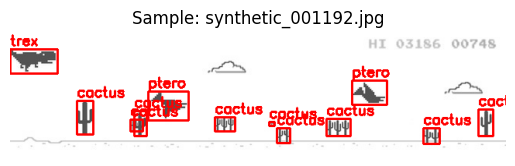

In [10]:
# Path to data.yaml file
yaml_path = "/kaggle/working/final_dataset/data.yaml"

# 1. Read the yaml file
with open(yaml_path, "r") as f:
    data_cfg = yaml.safe_load(f)

print("Config file:", data_cfg)

# Base path (directory containing data.yaml)
base_path = os.path.dirname(os.path.abspath(yaml_path))

# Convert relative paths to absolute paths
train_path = os.path.join(base_path, data_cfg["train"])
val_path   = os.path.join(base_path, data_cfg["val"])
test_path  = data_cfg.get("test", None)
if test_path:
    test_path = os.path.join(base_path, test_path)

class_names = data_cfg["names"]

print("\n📂 Paths:")
print("Train:", train_path)
print("Val:", val_path)
print("Test:", test_path)
print("\n🧾 Classes:", class_names)

# 2. Count images and labels
def count_files(img_dir):
    img_exts = [".jpg", ".jpeg", ".png"]
    cnt = 0
    for f in os.listdir(img_dir):
        if os.path.splitext(f)[1].lower() in img_exts:
            cnt += 1
    return cnt

print("\n📊 Dataset size:")
print("Train images:", count_files(train_path))
print("Val images:", count_files(val_path))
if test_path:
    print("Test images:", count_files(test_path))

# 3. Display a random image with bounding boxes
def plot_sample(img_dir, label_dir, class_names):
    img_files = [f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
    sample = random.choice(img_files)
    
    img_path = os.path.join(img_dir, sample)
    label_path = os.path.join(label_dir, sample.replace(".jpg", ".txt").replace(".png", ".txt"))

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if os.path.exists(label_path):
        h, w, _ = img.shape
        with open(label_path, "r") as f:
            for line in f.readlines():
                cls, x, y, bw, bh = map(float, line.strip().split())
                cls = int(cls)
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(img, class_names[cls], (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    plt.imshow(img)
    plt.title(f"Sample: {sample}")
    plt.axis("off")
    plt.show()

print("\n📸 Display a sample image from train set:")
plot_sample(train_path, train_path.replace("images", "labels"), class_names)


In [ ]:
model = YOLO("yolo11n.pt")

model.train(data=yaml_path, epochs=200, imgsz=640, batch=128, device=[0,1], patience=10, workers=2, augment=True)

Ultralytics 8.3.204 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=128, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/final_dataset/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimi

The early stopping didnt seem to work so I stoped the cell manually 🤷‍♂️

Ultralytics 8.3.204 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 437.4±64.1 MB/s, size: 13.4 KB)
val: Scanning /kaggle/working/final_dataset/test/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2000/2000 2.6Mit/s 0.0s0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 125/125 11.0it/s 11.3s0.1s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2000      21848      0.999      0.995      0.995      0.991
                cactus       2000      12840      0.997      0.987      0.995      0.984
                 ptero       2000       7008          1      0.997      0.995      0.995
                  trex       2000       2000      0.999          1      0.995      0.994
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/runs/detect/val


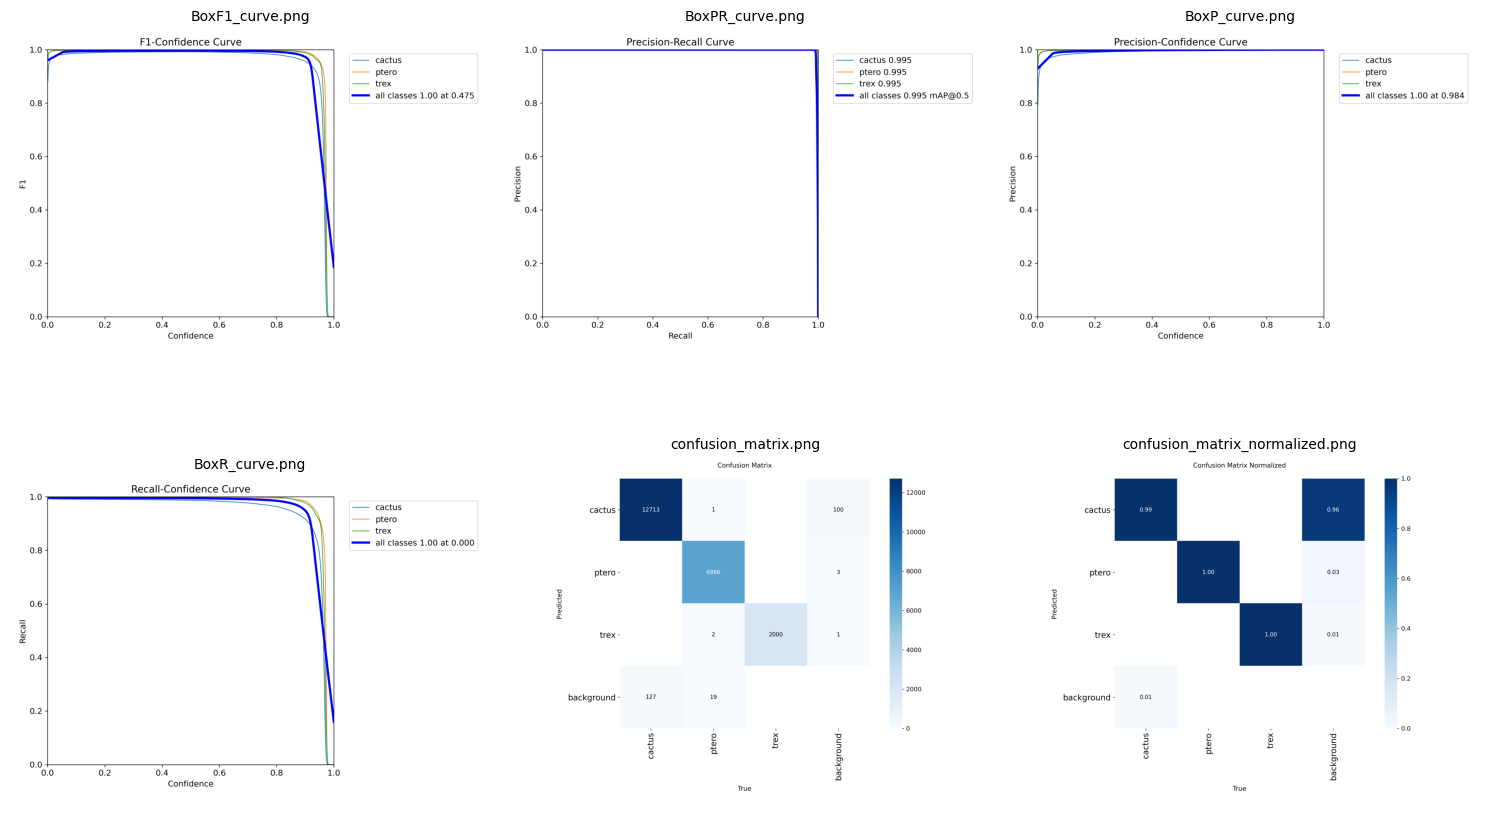

In [ ]:
import matplotlib.image as mpimg


results = model.val(data=yaml_path, split="test", save=True)

val_path = "/kaggle/working/runs/detect/val"

images = [
    "BoxF1_curve.png",
    "BoxPR_curve.png",
    "BoxP_curve.png",
    "BoxR_curve.png",
    "confusion_matrix.png",
    "confusion_matrix_normalized.png"
]

plt.figure(figsize=(15, 10))
for i, img_name in enumerate(images, 1):
    img_path = os.path.join(val_path, img_name)
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.subplot(2, 3, i)  
        plt.imshow(img)
        plt.title(img_name, fontsize=10)
        plt.axis("off")
    else:
        print(f"⚠️ File not found: {img_path}")

plt.tight_layout()
plt.show()
